# Revisão de tópicos para a AF

## Modelos lineares com regularização

#### Modelo

Em todos os modelos de regressão linear, o modelo é o mesmo:

$$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n
$$

A diferença entre as versões abaixo está na <span style='color:red'>função de perda</span>.

#### Mean squared-error

A função básica de perda da regressão linear é o erro quadrático médio (*mean squared error* - MSE).

Para um conjunto de treino de $m$ exemplos, seja $x^{(i)}$ o vetor de *features* do $i$-ésimo exemplo, $y^{(i)}$ o *target* do $i$-ésimo exemplo e $\hat{y}^{(i)}$ o valor predito para o $i$-ésimo exemplo. O valor do MSE é dado por:

$$
\text{MSE}(\overrightarrow{\theta}) = 
\frac{1}{m} \sum_{i = 1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^{2}
$$

#### Alguns dados de exemplo

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X, y = load_diabetes(return_X_y=True, scaled=False)

poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

### Sem regularização

#### Função de perda

A função de perda sem regularização é simplesmente o MSE:

$$
\mathcal{L}(\overrightarrow{\theta}) = \frac{1}{2}\text{MSE}(\overrightarrow{\theta})
$$

#### Coisas importantes

- Não requer normalização
- Não tem hiperparâmetros
- Não pode ter colinearidade de colunas
- Não combate overfitting

#### Aplicação

- Interpretabilidade: os coeficientes representam "aumento do target por aumento unitário da feature"

#### Exemplo em sklearn

In [2]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [3]:
from sklearn.metrics import mean_squared_error

y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error, train: {mse_train=:.2f}')

Mean Squared Error, train: mse_train=2393.14


In [4]:
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error, test: {mse_test=:.2f}')

Mean Squared Error, test: mse_test=3096.03


In [5]:
print(f'Model coefficients:')
for i, coef in enumerate(model.coef_):
    print(f'  {i+1}: {coef.round(2)}')
print(f'Model intercept: {model.intercept_.round(2)}')

Model coefficients:
  1: -9.59
  2: -11.24
  3: -19.7
  4: 10.64
  5: -16.59
  6: 26.14
  7: 11.13
  8: -160.29
  9: -1768.67
  10: -13.82
  11: 0.03
  12: 0.53
  13: -0.05
  14: 0.01
  15: -0.0
  16: -0.04
  17: 0.08
  18: 1.31
  19: 0.41
  20: 0.01
  21: -33.71
  22: 0.36
  23: 0.41
  24: 0.21
  25: 0.25
  26: -1.24
  27: -26.74
  28: 18.52
  29: 0.27
  30: 0.09
  31: 0.12
  32: -0.09
  33: 0.12
  34: -0.01
  35: -1.43
  36: 3.63
  37: 0.02
  38: -0.0
  39: 0.09
  40: -0.08
  41: -0.11
  42: -0.18
  43: -2.48
  44: -0.05
  45: 0.18
  46: -0.28
  47: -0.31
  48: -1.28
  49: -5.05
  50: -0.04
  51: 0.11
  52: 0.2
  53: 0.37
  54: 3.38
  55: 0.03
  56: 0.15
  57: 2.2
  58: 4.46
  59: 0.12
  60: 16.31
  61: 15.19
  62: 0.86
  63: 273.67
  64: 1.88
  65: 0.02
Model intercept: 3792.08


### Ridge

#### Função de perda

A função de perda da regressão Ridge (ou regularização $L_2$) incorpora um termo de penalidade para a soma dos quadrados dos coeficientes da regressão. O hiperparâmetro $\alpha$ controla a intensidade da penalidade.

$$
\mathcal{L} = \frac{1}{2}\text{MSE}(\overrightarrow{\theta}) + \frac{\alpha}{2} \sum_{i=1}^{n} \theta_i^2
$$

#### Coisas importantes

- Requer normalização dos dados
- Tem hiperparâmetro: $\alpha$
- Valores mais altos de $\alpha$ combatem colinearidade
- Interpretação mais difícil: a escolha de $\alpha$ impacta os valores de $\theta$, e portanto mudam a interpretação

#### Aplicação

- Combate colinearidade
- Combate overfitting

#### Exemplo em sklearn

In [6]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

- Pouca regularização:

In [7]:
alpha = 1e-3

In [8]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge(alpha=alpha)),
])
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', Ridge(alpha=0.001))])

In [9]:
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error, train, {alpha=}: {mse_train=:.2f}')

Mean Squared Error, train, alpha=0.001: mse_train=2403.47


In [10]:
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error, test, {alpha=}: {mse_test=:.2f}')

Mean Squared Error, test, alpha=0.001: mse_test=3068.03


In [11]:
print(f'Model coefficients:')
for i, coef in enumerate(model.named_steps['regressor'].coef_):
    print(f'  {i+1}: {coef.round(2)}')
print(f'Model intercept: {model.named_steps['regressor'].intercept_.round(2)}')

Model coefficients:
  1: -124.43
  2: -27.17
  3: -104.57
  4: 132.7
  5: -370.15
  6: 498.72
  7: 113.2
  8: -93.93
  9: -437.42
  10: -143.06
  11: 37.41
  12: 21.92
  13: -19.43
  14: 12.14
  15: -16.11
  16: -95.03
  17: 77.52
  18: 116.2
  19: 21.2
  20: 20.65
  21: -27.17
  22: 9.06
  23: 22.11
  24: 12.44
  25: 26.1
  26: -26.65
  27: -84.58
  28: 36.61
  29: 14.38
  30: 25.99
  31: 82.25
  32: -260.89
  33: 232.21
  34: 24.56
  35: -64.18
  36: 144.81
  37: 13.54
  38: -7.16
  39: 394.34
  40: -244.61
  41: -122.09
  42: -19.87
  43: -210.51
  44: -97.66
  45: 598.55
  46: -519.85
  47: -16.21
  48: -138.28
  49: -437.22
  50: -107.57
  51: 139.02
  52: -116.02
  53: -119.08
  54: 205.51
  55: 18.68
  56: -38.69
  57: 41.45
  58: 14.97
  59: 113.82
  60: 174.23
  61: -57.85
  62: 133.79
  63: 673.43
  64: 124.32
  65: 48.86
Model intercept: 153.74


- Regularização média

In [12]:
alpha = 1.0

In [13]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge(alpha=alpha)),
])
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('regressor', Ridge())])

In [14]:
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error, test, {alpha=}: {mse_train=:.2f}')

Mean Squared Error, test, alpha=1.0: mse_train=2577.87


In [15]:
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error, test, {alpha=}: {mse_test=:.2f}')

Mean Squared Error, test, alpha=1.0: mse_test=2638.69


In [16]:
print(f'Model coefficients:')
for i, coef in enumerate(model.named_steps['regressor'].coef_):
    print(f'  {i+1}: {coef.round(2)}')
print(f'Model intercept: {model.named_steps['regressor'].intercept_.round(2)}')

Model coefficients:
  1: -53.33
  2: -20.72
  3: -16.59
  4: -9.08
  5: -24.55
  6: 9.2
  7: -17.18
  8: 11.39
  9: -16.2
  10: -33.97
  11: 26.07
  12: 28.61
  13: -10.8
  14: 11.9
  15: -1.47
  16: -36.91
  17: 15.38
  18: 25.47
  19: 18.29
  20: -3.26
  21: -20.72
  22: 2.6
  23: 18.49
  24: 5.7
  25: -11.63
  26: 1.8
  27: -14.79
  28: -0.31
  29: 2.13
  30: 20.05
  31: 47.9
  32: -23.32
  33: 8.55
  34: -7.12
  35: -1.21
  36: -0.75
  37: 16.0
  38: -8.11
  39: 4.03
  40: 13.05
  41: 6.84
  42: -1.09
  43: 16.06
  44: -41.03
  45: -0.13
  46: 9.29
  47: 14.95
  48: -34.53
  49: -5.27
  50: -2.09
  51: -3.79
  52: -7.94
  53: 4.42
  54: 36.24
  55: 8.84
  56: -12.08
  57: -10.48
  58: 17.5
  59: 6.77
  60: 12.97
  61: -12.31
  62: 22.94
  63: 12.78
  64: 21.12
  65: 25.6
Model intercept: 153.74


- Regularização alta

In [17]:
alpha = 1000.0

In [18]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge(alpha=alpha)),
])
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', Ridge(alpha=1000.0))])

In [19]:
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error, test, {alpha=}: {mse_train=:.2f}')

Mean Squared Error, test, alpha=1000.0: mse_train=3079.07


In [20]:
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error, test, {alpha=}: {mse_test=:.2f}')

Mean Squared Error, test, alpha=1000.0: mse_test=2942.16


In [21]:
print(f'Model coefficients:')
for i, coef in enumerate(model.named_steps['regressor'].coef_):
    print(f'  {i+1}: {coef.round(2)}')
print(f'Model intercept: {model.named_steps['regressor'].intercept_.round(2)}')

Model coefficients:
  1: 0.14
  2: -1.16
  3: 3.62
  4: 2.34
  5: -0.42
  6: -0.81
  7: -1.57
  8: 0.99
  9: 2.96
  10: 0.89
  11: 0.35
  12: -0.31
  13: 2.02
  14: 1.34
  15: -0.21
  16: -0.69
  17: -1.01
  18: 0.84
  19: 1.35
  20: 0.58
  21: -1.16
  22: 0.67
  23: 0.08
  24: -1.22
  25: -1.47
  26: -2.25
  27: -0.2
  28: -0.05
  29: -0.64
  30: 3.8
  31: 3.8
  32: 1.76
  33: 1.0
  34: 0.54
  35: 2.24
  36: 3.91
  37: 3.03
  38: 2.41
  39: 1.03
  40: 0.35
  41: -0.17
  42: 1.72
  43: 3.18
  44: 2.03
  45: -0.42
  46: -0.68
  47: -1.28
  48: 0.36
  49: 0.91
  50: 0.15
  51: -0.86
  52: -1.76
  53: 0.06
  54: 0.32
  55: -0.31
  56: -1.35
  57: -0.55
  58: -0.17
  59: -1.23
  60: 0.88
  61: 1.48
  62: 1.17
  63: 2.84
  64: 2.23
  65: 1.02
Model intercept: 153.74


### LASSO

#### Função de perda

A função de perda da regressão LASSO (Least Absolute Shrinking and Selection Operator, também conhecida como regularização $L_1$) incorpora um termo de penalidade para a soma dos valores absolutos dos coeficientes da regressão. O hiperparâmetro $\alpha$ controla a intensidade da penalidade.

$$
\mathcal{L} = \frac{1}{2}\text{MSE}(\overrightarrow{\theta}) + \alpha \sum_{i=1}^{n} |\theta_i|
$$

#### Coisas importantes

- Requer normalização dos dados
- Valores mais altos de $\alpha$ servem para selecionar features
- Interpretação mais difícil: a escolha de $\alpha$ impacta os valores de $\theta$, e portanto mudam a interpretação

#### Aplicação

- Seleciona features
- Combate overfitting

#### Exemplo em sklearn

In [22]:
from sklearn.linear_model import Lasso

- Pouca regularização:

In [23]:
alpha = 1e-6

In [24]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso(alpha=alpha)),
])
model.fit(X_train, y_train)

/home/fjayres/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.421e+05, tolerance: 2.145e+02
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', Lasso(alpha=1e-06))])

In [25]:
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error, train, {alpha=}: {mse_train=:.2f}')

Mean Squared Error, train, alpha=1e-06: mse_train=2504.85


In [26]:
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error, test, {alpha=}: {mse_test=:.2f}')

Mean Squared Error, test, alpha=1e-06: mse_test=2701.96


In [27]:
print(f'Model coefficients:')
for i, coef in enumerate(model.named_steps['regressor'].coef_):
    print(f'  {i+1}: {coef.round(2)}')
print(f'Model intercept: {model.named_steps['regressor'].intercept_.round(2)}')

Model coefficients:
  1: -134.18
  2: -7.68
  3: -55.75
  4: 20.53
  5: -71.24
  6: 41.94
  7: -7.38
  8: 15.6
  9: -21.57
  10: -59.22
  11: 30.97
  12: 31.44
  13: -21.67
  14: 32.75
  15: -13.31
  16: -79.66
  17: 80.8
  18: 102.09
  19: 28.53
  20: 2.64
  21: -47.67
  22: 8.44
  23: 26.71
  24: 22.02
  25: -11.13
  26: -7.92
  27: -40.11
  28: -2.3
  29: 15.6
  30: 28.56
  31: 97.34
  32: -51.42
  33: 41.14
  34: -6.72
  35: -27.09
  36: 14.14
  37: 20.65
  38: -25.9
  39: 30.17
  40: 14.83
  41: -15.3
  42: -32.91
  43: -1.94
  44: -89.22
  45: -12.1
  46: 26.88
  47: 54.38
  48: -108.55
  49: 20.21
  50: 38.24
  51: -8.28
  52: -32.52
  53: 31.92
  54: 56.39
  55: -38.57
  56: -46.95
  57: -8.69
  58: -15.4
  59: 36.61
  60: 33.2
  61: -33.7
  62: 65.64
  63: 27.57
  64: 17.87
  65: 39.58
Model intercept: 153.74


- Regularização média

In [28]:
alpha = 1e-1

In [29]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso(alpha=alpha)),
])
model.fit(X_train, y_train)

/home/fjayres/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.886e+03, tolerance: 2.145e+02
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('scaler', StandardScaler()), ('regressor', Lasso(alpha=0.1))])

In [30]:
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error, test, {alpha=}: {mse_train=:.2f}')

Mean Squared Error, test, alpha=0.1: mse_train=2615.56


In [31]:
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error, test, {alpha=}: {mse_test=:.2f}')

Mean Squared Error, test, alpha=0.1: mse_test=2623.91


In [32]:
print(f'Model coefficients:')
for i, coef in enumerate(model.named_steps['regressor'].coef_):
    print(f'  {i+1}: {coef.round(2)}')
print(f'Model intercept: {model.named_steps['regressor'].intercept_.round(2)}')

Model coefficients:
  1: -61.65
  2: -4.77
  3: -0.0
  4: -0.0
  5: -18.97
  6: 0.0
  7: -6.73
  8: 0.0
  9: -0.0
  10: -21.09
  11: 25.0
  12: 31.82
  13: -0.98
  14: 7.35
  15: -0.0
  16: -29.65
  17: 13.29
  18: 13.42
  19: 22.01
  20: 0.0
  21: -27.64
  22: -0.0
  23: 11.15
  24: -0.0
  25: -5.07
  26: -0.0
  27: -13.36
  28: -0.0
  29: -0.0
  30: 9.49
  31: 48.38
  32: -11.98
  33: 0.0
  34: -11.2
  35: 0.0
  36: -0.0
  37: 0.0
  38: -0.0
  39: 0.0
  40: 8.91
  41: 0.0
  42: 0.0
  43: 0.0
  44: -32.62
  45: -0.0
  46: 0.0
  47: 0.0
  48: -28.48
  49: -0.0
  50: 0.0
  51: 0.0
  52: -0.0
  53: 2.93
  54: 47.68
  55: 0.66
  56: -0.0
  57: -6.36
  58: 14.63
  59: 0.0
  60: 7.67
  61: -0.0
  62: 26.38
  63: 0.0
  64: 7.18
  65: 28.94
Model intercept: 153.74


- Regularização alta

In [33]:
alpha = 100.0

In [34]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso(alpha=alpha)),
])
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', Lasso(alpha=100.0))])

In [35]:
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error, test, {alpha=}: {mse_train=:.2f}')

Mean Squared Error, test, alpha=100.0: mse_train=6076.40


In [36]:
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error, test, {alpha=}: {mse_test=:.2f}')

Mean Squared Error, test, alpha=100.0: mse_test=5361.53


In [37]:
print(f'Model coefficients:')
for i, coef in enumerate(model.named_steps['regressor'].coef_):
    print(f'  {i+1}: {coef.round(2)}')
print(f'Model intercept: {model.named_steps['regressor'].intercept_.round(2)}')

Model coefficients:
  1: 0.0
  2: 0.0
  3: 0.0
  4: 0.0
  5: 0.0
  6: 0.0
  7: -0.0
  8: 0.0
  9: 0.0
  10: 0.0
  11: 0.0
  12: 0.0
  13: 0.0
  14: 0.0
  15: 0.0
  16: 0.0
  17: -0.0
  18: 0.0
  19: 0.0
  20: 0.0
  21: 0.0
  22: 0.0
  23: 0.0
  24: 0.0
  25: 0.0
  26: -0.0
  27: 0.0
  28: 0.0
  29: 0.0
  30: 0.0
  31: 0.0
  32: 0.0
  33: 0.0
  34: -0.0
  35: 0.0
  36: 0.0
  37: 0.0
  38: 0.0
  39: 0.0
  40: 0.0
  41: -0.0
  42: 0.0
  43: 0.0
  44: 0.0
  45: 0.0
  46: 0.0
  47: -0.0
  48: 0.0
  49: 0.0
  50: 0.0
  51: 0.0
  52: -0.0
  53: 0.0
  54: 0.0
  55: 0.0
  56: -0.0
  57: 0.0
  58: -0.0
  59: -0.0
  60: 0.0
  61: 0.0
  62: 0.0
  63: 0.0
  64: 0.0
  65: 0.0
Model intercept: 153.74


### ElasticNet

#### Função de perda

A função de perda da regressão ElasticNet combina as perdas Ridge e LASSO. O hiperparâmetro $\alpha$ controla a intensidade da penalidade. O hiperparâmetro `l1_ratio` controla o balanço entre a porção LASSO e a porção Ridge.

$$
\mathcal{L} = \frac{1}{2}\text{MSE}(\overrightarrow{\theta}) + r \alpha \sum_{i=1}^{n} |\theta_i| + (1 - r) \frac{\alpha}{2} \sum_{i=1}^{n} \theta_i^2
$$

onde $r$ é `l1_ratio`.

#### Coisas importantes

- Requer normalização dos dados
- Valores mais altos de $\alpha$ servem para regularizar mais
- Valores maiores de `l1_ratio` levam o ElasticNet para um comportamento de LASSO
- Valores menores de `l1_ratio` levam o ElasticNet para um comprotamento de Ridge
- Interpretação mais difícil: a escolha de $\alpha$ e `l1_ratio` impacta os valores de $\theta$, e portanto mudam a interpretação

#### Aplicação

- Seleciona features
- Combate colinearidade
- Combate overfitting

#### Exemplo em sklearn

In [38]:
from sklearn.linear_model import ElasticNet

In [39]:
l1_ratio = 0.5

- Pouca regularização:

In [40]:
alpha = 1e-6

In [41]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', ElasticNet(alpha=alpha, l1_ratio=l1_ratio)),
])
model.fit(X_train, y_train)

/home/fjayres/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.421e+05, tolerance: 2.145e+02
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', ElasticNet(alpha=1e-06))])

In [42]:
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error, train, {alpha=}: {mse_train=:.2f}')

Mean Squared Error, train, alpha=1e-06: mse_train=2504.85


In [43]:
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error, test, {alpha=}: {mse_test=:.2f}')

Mean Squared Error, test, alpha=1e-06: mse_test=2701.88


In [44]:
print(f'Model coefficients:')
for i, coef in enumerate(model.named_steps['regressor'].coef_):
    print(f'  {i+1}: {coef.round(2)}')
print(f'Model intercept: {model.named_steps['regressor'].intercept_.round(2)}')

Model coefficients:
  1: -134.15
  2: -7.69
  3: -55.74
  4: 20.51
  5: -71.22
  6: 41.91
  7: -7.39
  8: 15.6
  9: -21.58
  10: -59.2
  11: 30.96
  12: 31.44
  13: -21.66
  14: 32.74
  15: -13.31
  16: -79.64
  17: 80.77
  18: 102.06
  19: 28.54
  20: 2.64
  21: -47.65
  22: 8.43
  23: 26.71
  24: 22.02
  25: -11.14
  26: -7.92
  27: -40.1
  28: -2.3
  29: 15.6
  30: 28.56
  31: 97.33
  32: -51.4
  33: 41.12
  34: -6.71
  35: -27.08
  36: 14.12
  37: 20.65
  38: -25.89
  39: 30.15
  40: 14.83
  41: -15.29
  42: -32.89
  43: -1.94
  44: -89.21
  45: -12.1
  46: 26.87
  47: 54.36
  48: -108.51
  49: 20.19
  50: 38.23
  51: -8.27
  52: -32.5
  53: 31.91
  54: 56.39
  55: -38.55
  56: -46.93
  57: -8.69
  58: -15.38
  59: 36.59
  60: 33.19
  61: -33.7
  62: 65.62
  63: 27.58
  64: 17.87
  65: 39.58
Model intercept: 153.74


- Regularização média

In [45]:
alpha = 1e-1

In [46]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', ElasticNet(alpha=alpha, l1_ratio=l1_ratio)),
])
model.fit(X_train, y_train)

/home/fjayres/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.932e+03, tolerance: 2.145e+02
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', ElasticNet(alpha=0.1))])

In [47]:
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error, test, {alpha=}: {mse_train=:.2f}')

Mean Squared Error, test, alpha=0.1: mse_train=2778.64


In [48]:
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error, test, {alpha=}: {mse_test=:.2f}')

Mean Squared Error, test, alpha=0.1: mse_test=2808.08


In [49]:
print(f'Model coefficients:')
for i, coef in enumerate(model.named_steps['regressor'].coef_):
    print(f'  {i+1}: {coef.round(2)}')
print(f'Model intercept: {model.named_steps['regressor'].intercept_.round(2)}')

Model coefficients:
  1: -6.23
  2: -5.04
  3: 2.56
  4: 0.33
  5: -5.6
  6: 0.72
  7: -1.3
  8: 1.33
  9: 6.57
  10: -3.27
  11: 5.48
  12: 10.33
  13: 0.0
  14: 2.82
  15: -4.28
  16: -4.4
  17: -2.84
  18: 1.98
  19: 3.18
  20: -0.42
  21: -5.02
  22: 0.97
  23: 3.21
  24: -4.59
  25: -4.69
  26: -1.89
  27: -3.63
  28: 0.0
  29: -0.96
  30: 9.29
  31: 10.33
  32: -2.56
  33: 2.57
  34: -3.36
  35: 4.62
  36: 5.92
  37: 5.26
  38: 2.09
  39: -0.0
  40: 3.1
  41: 0.0
  42: 1.61
  43: 6.61
  44: -0.72
  45: -2.43
  46: 0.0
  47: 0.18
  48: -3.96
  49: -0.0
  50: -2.23
  51: 0.21
  52: -0.4
  53: 2.1
  54: 6.57
  55: 2.6
  56: 1.25
  57: -4.57
  58: 8.1
  59: -4.12
  60: 1.87
  61: -0.0
  62: 4.59
  63: 3.74
  64: 4.31
  65: 2.37
Model intercept: 153.74


- Regularização alta

In [50]:
alpha = 100.0

In [51]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', ElasticNet(alpha=alpha, l1_ratio=l1_ratio)),
])
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', ElasticNet(alpha=100.0))])

In [52]:
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error, test, {alpha=}: {mse_train=:.2f}')

Mean Squared Error, test, alpha=100.0: mse_train=6070.63


In [53]:
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error, test, {alpha=}: {mse_test=:.2f}')

Mean Squared Error, test, alpha=100.0: mse_test=5356.34


In [54]:
print(f'Model coefficients:')
for i, coef in enumerate(model.named_steps['regressor'].coef_):
    print(f'  {i+1}: {coef.round(2)}')
print(f'Model intercept: {model.named_steps['regressor'].intercept_.round(2)}')

Model coefficients:
  1: 0.0
  2: 0.0
  3: 0.0
  4: 0.0
  5: 0.0
  6: 0.0
  7: -0.0
  8: 0.0
  9: 0.0
  10: 0.0
  11: 0.0
  12: 0.0
  13: 0.0
  14: 0.0
  15: 0.0
  16: 0.0
  17: -0.0
  18: 0.0
  19: 0.0
  20: 0.0
  21: 0.0
  22: 0.0
  23: 0.0
  24: 0.0
  25: 0.0
  26: -0.0
  27: 0.0
  28: 0.0
  29: 0.0
  30: 0.0
  31: 0.0
  32: 0.0
  33: 0.0
  34: -0.0
  35: 0.0
  36: 0.05
  37: 0.0
  38: 0.0
  39: 0.0
  40: 0.0
  41: -0.0
  42: 0.0
  43: 0.0
  44: 0.0
  45: 0.0
  46: 0.0
  47: -0.0
  48: 0.0
  49: 0.0
  50: 0.0
  51: 0.0
  52: -0.0
  53: 0.0
  54: 0.0
  55: 0.0
  56: -0.0
  57: 0.0
  58: -0.0
  59: -0.0
  60: 0.0
  61: 0.0
  62: 0.0
  63: 0.0
  64: 0.0
  65: 0.0
Model intercept: 153.74


### Atividade

Faça o ajuste de hiperparâmetros com validação cruzada (ou seja `GridSearchCV`) para um modelo ElasticNet para este exemplo.

In [55]:
from sklearn.dummy import DummyRegressor

cv = 5

param_grid = [
    {
        'scaler': [None],
        'regressor': [LinearRegression(), DummyRegressor()],
    },
    {
        'regressor': [Ridge(), Lasso(max_iter=100000)],
        'regressor__alpha': [10**k for k in range(-6, 3)],
    },
    {
        'regressor': [ElasticNet()],
        'regressor__alpha': [10**k for k in range(-6, 3)],
        'regressor__l1_ratio': [0.1 * k for k in range(1, 10)],
    },
]

In [56]:
from sklearn.model_selection import GridSearchCV

grid_model = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',
    return_train_score=True,
    n_jobs=-1,
)

grid_model.fit(X_train, y_train)

/home/fjayres/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.328e+05, tolerance: 1.755e+02
  model = cd_fast.enet_coordinate_descent(
/home/fjayres/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.100e+05, tolerance: 1.559e+02
  model = cd_fast.enet_coordinate_descent(
/home/fjayres/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', ElasticNet(alpha=100.0))]),
             n_jobs=-1,
             param_grid=[{'regressor': [LinearRegression(), DummyRegressor()],
                          'scaler': [None]},
                         {'regressor': [Ridge(), Lasso(max_iter=100000)],
                          'regressor__alpha': [1e-06, 1e-05, 0.0001, 0.001,
                                               0.01, 0.1, 1, 10, 100]},
                         {'regressor': [ElasticNet()],
                          'regressor__alpha': [1e-06, 1e-05, 0.0001, 0.001,
                                               0.01, 0.1, 1, 10, 100],
                          'regressor__l1_ratio': [0.1, 0.2, 0.30000000000000004,
                                                  0.4, 0.5, 0.6000000000000001,
                                                  0.7000000000000001, 0.8,
                                                  0.9]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [57]:
import pandas as pd

pd.DataFrame(grid_model.cv_results_) \
    .sort_values(by='rank_test_score') \
    .loc[:, ['params', 'mean_train_score', 'mean_test_score', 'std_test_score']] \
    .assign(
        mean_test_score=lambda df: df['mean_test_score'].apply(lambda x: -x),
        mean_train_score=lambda df: df['mean_train_score'].apply(lambda x: -x),
    )

,params,mean_train_score,mean_test_score,std_test_score
80,"{'regressor': ElasticNet(), 'regressor__alpha'...",2855.153794,3117.808335,295.234050
79,"{'regressor': ElasticNet(), 'regressor__alpha'...",2860.981616,3118.394104,297.011588
78,"{'regressor': ElasticNet(), 'regressor__alpha'...",2866.426344,3119.592505,297.714597
81,"{'regressor': ElasticNet(), 'regressor__alpha'...",2849.073445,3119.742081,292.919155
10,"{'regressor': Ridge(), 'regressor__alpha': 100}",2831.273742,3120.829865,303.512171
...,...,...,...,...
1,"{'regressor': DummyRegressor(), 'scaler': None}",6070.748449,6132.616302,1178.575700
97,"{'regressor': ElasticNet(), 'regressor__alpha'...",6070.748449,6132.616302,1178.575700
98,"{'regressor': ElasticNet(), 'regressor__alpha'...",6070.748449,6132.616302,1178.575700
99,"{'regressor': ElasticNet(), 'regressor__alpha'...",6070.748449,6132.616302,1178.575700


In [58]:
best_model = grid_model.best_estimator_
print(f'Best model: {best_model}')

Best model: Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 ElasticNet(alpha=1, l1_ratio=0.7000000000000001))])


In [59]:
best_model.fit(X_train, y_train)

y_pred_train = best_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error, train: {mse_train=:.2f}')

y_pred_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error, test: {mse_test=:.2f}')

Mean Squared Error, train: mse_train=2885.58
Mean Squared Error, test: mse_test=2859.77


## Logistic Regression

### Aplicação

- Classificação

    - Binária

    - Multiclasse

### Modelo

#### Classificação binária

$$
\text{logit} = \theta_0 + \theta_1 x_1 + \cdots + \theta_n x_n \\
\hat{p} = \sigma(\text{logit}) \\
\hat{c} = (\hat{p} > T)
$$

onde $T$ é o threshold (normalmente $0.5$) e $\sigma(x)$ (função sigmóide) é:

$$
\sigma(x) = \frac{1}{1 + \exp(-x)}
$$

### Exemplo

In [60]:
from sklearn.datasets import make_moons

# Um dataset inventado só para o exemplo.
X, y = make_moons(noise=0.3, random_state=42, n_samples=10000)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

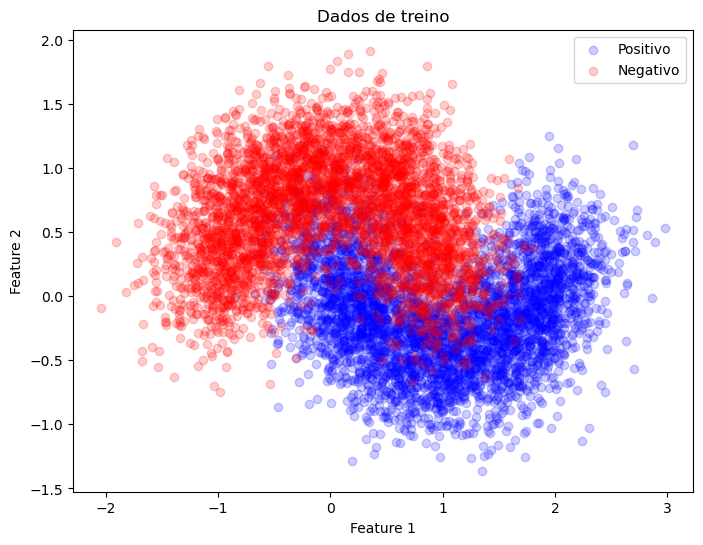

In [61]:
idx_pos = y_train == 1
idx_neg = y_train == 0

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(
    X_train[idx_pos, 0],
    X_train[idx_pos, 1],
    color='blue',
    label='Positivo',
    alpha=0.2,
)
plt.scatter(
    X_train[idx_neg, 0],
    X_train[idx_neg, 1],
    color='red',
    label='Negativo',
    alpha=0.2,
)
plt.title('Dados de treino')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
print(f'Acurácia de treino: {accuracy_score(y_train, y_pred_train):.2f}')

y_pred_test = model.predict(X_test)
print(f'Acurácia de teste: {accuracy_score(y_test, y_pred_test):.2f}')

Acurácia de treino: 0.85
Acurácia de teste: 0.87


In [63]:

confusion_matrix = pd.crosstab(
    y_test,
    y_pred_test,
    rownames=['Real'],
    colnames=['Previsto'],
)
confusion_matrix.index = ['Negativo', 'Positivo']
confusion_matrix.columns = ['Negativo', 'Positivo']
print(confusion_matrix)

          Negativo  Positivo
Negativo       878       135
Positivo       128       859


In [64]:
TP = confusion_matrix.loc['Positivo', 'Positivo']
TN = confusion_matrix.loc['Negativo', 'Negativo']
FP = confusion_matrix.loc['Negativo', 'Positivo']
FN = confusion_matrix.loc['Positivo', 'Negativo']


acuracia = (TP + TN) / (TP + TN + FP + FN)
print(f'Acurácia: {acuracia:.2f}')

precision = TP / (TP + FP)
recall = TP / (TP + FN)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

sensitivity = recall
specificity = TN / (TN + FP)
print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

f1 = 2 * (precision * recall) / (precision + recall)
print(f'F1 Score: {f1:.2f}')

Acurácia: 0.87
Precision: 0.86
Recall: 0.87
Sensitivity: 0.87
Specificity: 0.87
F1 Score: 0.87


In [65]:
y_proba = model.predict_proba(X_test)
y_proba[:5, :], y_test[:5]

(array([[0.01658889, 0.98341111],
        [0.08108103, 0.91891897],
        [0.88392438, 0.11607562],
        [0.96806805, 0.03193195],
        [0.88409716, 0.11590284]]),
 array([1, 1, 0, 1, 0]))

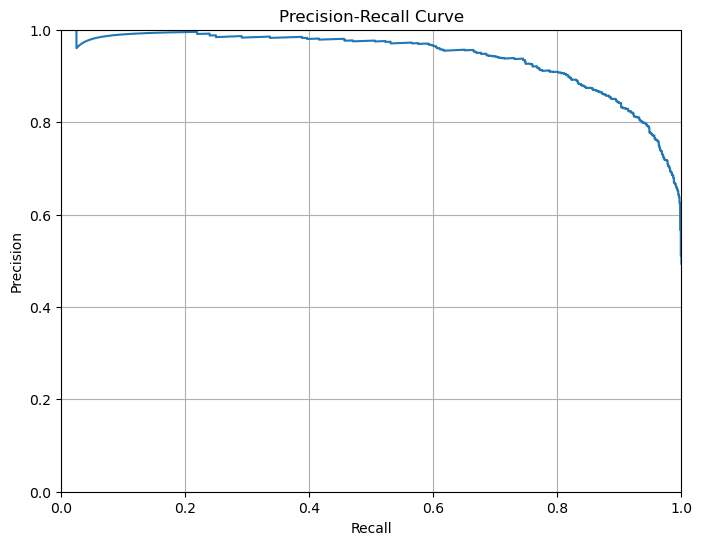

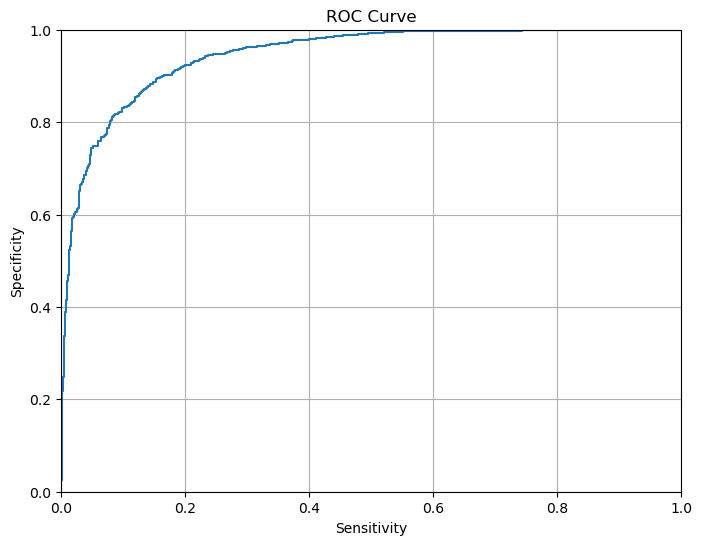

AUC: 0.95


In [66]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

y_proba_pos = y_proba[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_proba_pos)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid()
plt.show()

sensitivity, specificity, _ = roc_curve(y_test, y_proba_pos)

plt.figure(figsize=(8, 6))
plt.plot(sensitivity, specificity)
plt.title('ROC Curve')
plt.xlabel('Sensitivity')
plt.ylabel('Specificity')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid()
plt.show()

auc = roc_auc_score(y_test, y_proba_pos)
print(f'AUC: {auc:.2f}')


Outro exemplo, desta vez com features polinomiais e regularização.

In [67]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(C=1e3, max_iter=10000)),
])

# O parâmetro C é o inverso de alpha.

In [68]:
pipe.fit(X_train, y_train)

y_pred_train = pipe.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Acurácia de treino: {accuracy_train:.2f}')

y_pred_test = pipe.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Acurácia de teste: {accuracy_test:.2f}')

Acurácia de treino: 0.92
Acurácia de teste: 0.92


In [69]:
param_grid = {
    'poly__degree': [1, 2, 3],
    'classifier__C': [10**k for k in range(-6, 3)],
}

grid_model = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True,
    n_jobs=-1,
)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(degree=3,
                                                           include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(C=1000.0,
                                                           max_iter=10000))]),
             n_jobs=-1,
             param_grid={'classifier__C': [1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                           0.1, 1, 10, 100],
                         'poly__degree': [1, 2, 3]},
             return_train_score=True, scoring='accuracy')

In [70]:
pd.DataFrame(grid_model.cv_results_) \
    .sort_values(by='rank_test_score') \
    .loc[:, ['params', 'mean_train_score', 'mean_test_score', 'std_test_score']]

,params,mean_train_score,mean_test_score,std_test_score
26,"{'classifier__C': 100, 'poly__degree': 3}",0.917156,0.916625,0.006182
23,"{'classifier__C': 10, 'poly__degree': 3}",0.916250,0.916500,0.006621
20,"{'classifier__C': 1, 'poly__degree': 3}",0.912375,0.912500,0.007531
17,"{'classifier__C': 0.1, 'poly__degree': 3}",0.898281,0.897875,0.006080
14,"{'classifier__C': 0.01, 'poly__degree': 3}",0.874469,0.874250,0.008361
11,"{'classifier__C': 0.001, 'poly__degree': 3}",0.853875,0.854500,0.009734
13,"{'classifier__C': 0.01, 'poly__degree': 2}",0.851625,0.851875,0.008216
12,"{'classifier__C': 0.01, 'poly__degree': 1}",0.850906,0.851250,0.009083
16,"{'classifier__C': 0.1, 'poly__degree': 2}",0.851719,0.851250,0.007965
19,"{'classifier__C': 1, 'poly__degree': 2}",0.851688,0.851125,0.008056


In [71]:
best_model = grid_model.best_estimator_
print(f'Best model: {best_model}')

Best model: Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('classifier', LogisticRegression(C=100, max_iter=10000))])


In [72]:
best_model.fit(X_train, y_train)

y_pred_train = best_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Acurácia de treino: {accuracy_train:.2f}')

y_pred_test = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Acurácia de teste: {accuracy_test:.2f}')

Acurácia de treino: 0.92
Acurácia de teste: 0.92


## Support Vector Machines

### Modelo

A idéia central das máquinas de vetores de suporte (Support Vector Machines) é construir uma separação entre classes que seja a maior possível (a "avenida mais larga")

- Hard SVM: "ninguém pisa na avenida"

    - Não se usa esse modelo, é só para explicar em aula

- Soft SVM: "pode pisar na avenida, mas paga uma penalidade"

    - Esse é o que se usa

    - Hiperparâmetro $C$: custo de penalidade

        - Baixo $C$: pouca penalidade - alta regularização - underfitting

        - Alto $C$: alta penalidade - baixa regularização - overfitting

### Exemplos

In [73]:
# Linear SVM
from sklearn.svm import LinearSVC

model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LinearSVC(C=1e3, max_iter=10000)),
])
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LinearSVC(C=1000.0, max_iter=10000))])

In [74]:
y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Acurácia de treino: {accuracy_train:.2f}')

y_pred_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Acurácia de teste: {accuracy_test:.2f}')

Acurácia de treino: 0.85
Acurácia de teste: 0.87


In [75]:
# SVM com kernel RBF
# ATENÇÃO: O treinamento pode demorar um pouco - O(m^3 n)
from sklearn.svm import SVC

model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel='rbf', C=1e3, gamma=0.1)),
])
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(C=1000.0, gamma=0.1))])

In [76]:
y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Acurácia de treino: {accuracy_train:.2f}')

y_pred_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Acurácia de teste: {accuracy_test:.2f}')

Acurácia de treino: 0.91
Acurácia de teste: 0.93


In [77]:
# SVM com kernel polynomial
# ATENÇÃO: O treinamento pode demorar um pouco - O(m^2 n)

model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel='poly', C=1e3, degree=3)),
])
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(C=1000.0, kernel='poly'))])

In [78]:
y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Acurácia de treino: {accuracy_train:.2f}')

y_pred_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Acurácia de teste: {accuracy_test:.2f}')

Acurácia de treino: 0.85
Acurácia de teste: 0.86
